# 图像特效-摩尔纹特效

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [12]:
def moire_fringe(src,degree):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    midX = cols // 2
    midY = rows // 2
    for y in range(rows):
        for x in range(cols):
            offsetY = y - midY
            offsetX = x - midX
            radian = math.atan2(offsetY,offsetX)
            radius = np.sqrt(offsetX ** 2 + offsetY ** 2)
            
            nx = int(radius * np.cos(radian + radius * degree))
            ny = int(radius * np.sin(radian + radius * degree))
            
            nx = max(0,min(cols-1,nx))
            ny = max(0,min(rows-1,ny))
            
            dst[y,x] = src[ny,nx]
    dst = 0.5 * srcf + 0.5 * dst
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

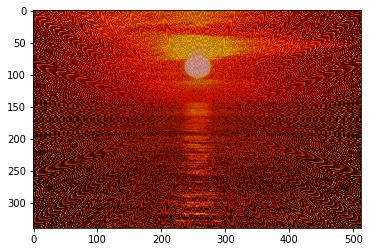

In [13]:
dst = moire_fringe(rgb,60)
plt.imshow(dst)